In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [3]:
df = pd.read_csv('C:/Users/Swetha/Downloads/Wholesale Customer.csv')

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [21]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [7]:
# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [45]:
# 1.1.1 Use methods of descriptive statistics to summarize data.

df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [48]:
print('Descriptive statistics of Data:')
df.describe().T

Descriptive statistics of Data:


,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [ ]:
# 1.1.2 Which Region and which Channel spent the most?
# 1.1.3 Which Region and which Channel spent the least?

In [50]:
# creating new column 'spent' with sum of all products
import copy
df_spent = copy.deepcopy(df)
df_spent['Spent'] = df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df_spent

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spent
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [59]:
#df_spent.groupby('Region')['Spent'].sum()
print('Most spent in the Region is from Other and Least spent in the Region is from Oporto.', df_spent.groupby('Region')['Spent'].sum())

Most spent in the Region is from Other and Least spent in the Region is from Oporto. Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spent, dtype: int64


In [60]:
# df_spent.groupby('Channel')['Spent'].sum()
print('Most spent in the Channel is from Hotel and Least spent in the Channel is from Retail.', df_spent.groupby('Channel')['Spent'].sum())

Most spent in the Channel is from Hotel and Least spent in the Channel is from Retail. Channel
Hotel     7999569
Retail    6619931
Name: Spent, dtype: int64


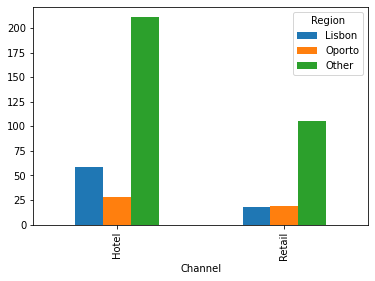

Region   Lisbon  Oporto  Other
Channel                       
Hotel        59      28    211
Retail       18      19    105


In [33]:
# Graphical Representation

def statistics_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

statistics_multi(i='Channel',j='Region')

In [43]:
# 1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [44]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Text(0.5, 1.0, 'Item - Fresh')

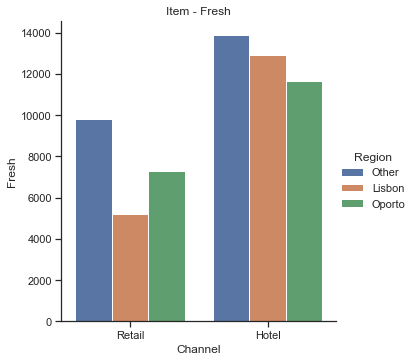

In [61]:
# Plotting Fresh Items
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Fresh')

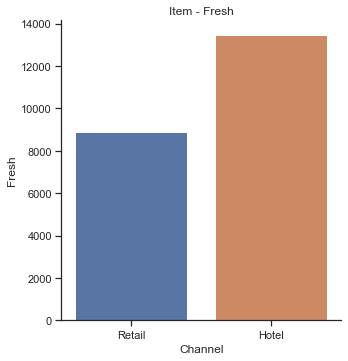

In [62]:
sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Fresh')

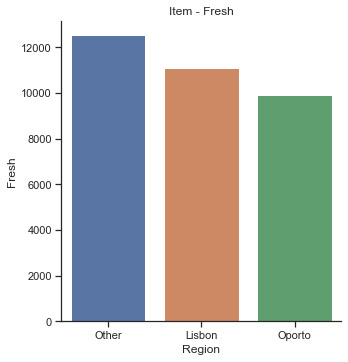

In [63]:
sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

In [64]:
# As per above plot Fresh items are most sold in Hotel under Channel and under Region its Other.

Text(0.5, 1.0, 'Item - Milk')

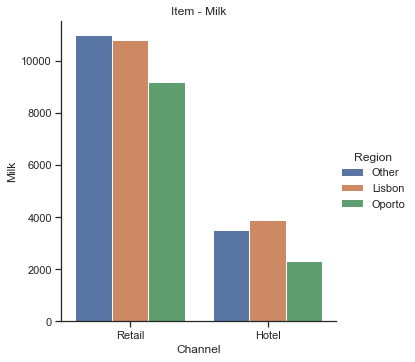

In [67]:
# Plotting Item - Milk
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Milk')

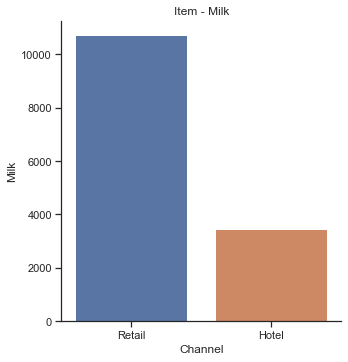

In [68]:
sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=df)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Milk')

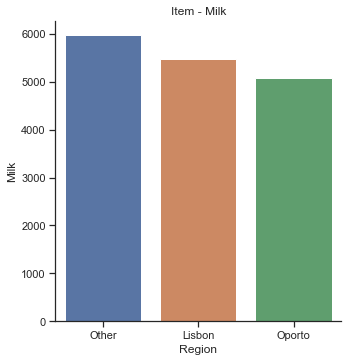

In [69]:
sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=df)
plt.title('Item - Milk')

In [70]:
# As per above plot Milk item is most sold in Retail under Channel and under Region its Other.

Text(0.5, 1.0, 'Item - Grocery')

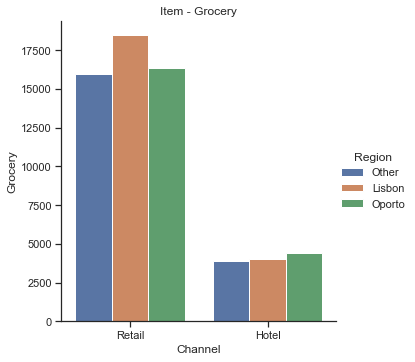

In [71]:
# Plotting Grocery Item
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

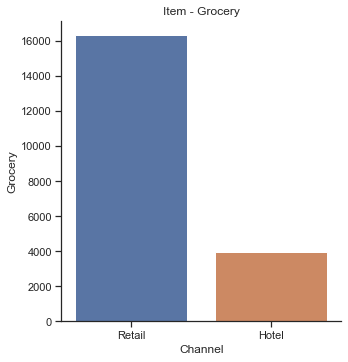

In [72]:
sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=df)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

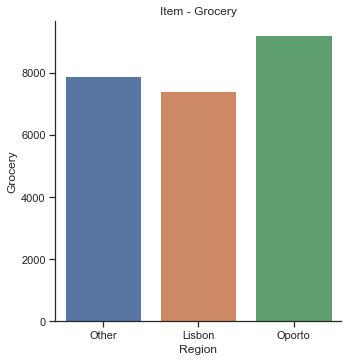

In [73]:
sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=df)
plt.title('Item - Grocery')

In [74]:
# As per above plot Grocery items are most sold in Retail under Channel and under Region its Oporto.

Text(0.5, 1.0, 'Item - Frozen')

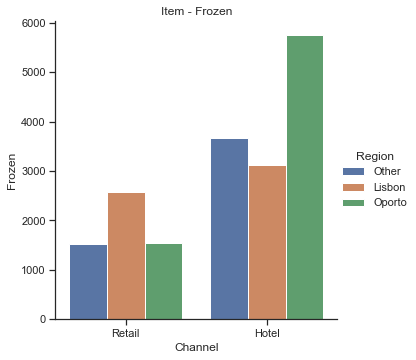

In [75]:
# Plotting Frozen items
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

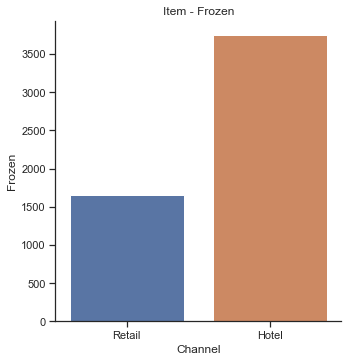

In [76]:
sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=df)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

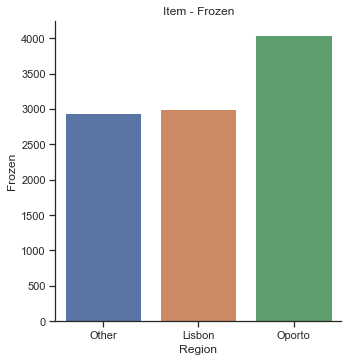

In [77]:
sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=df)
plt.title('Item - Frozen')

In [78]:
# As per above plot Frozen items are most sold in Hotels under Channel and under Region its Oporto.

Text(0.5, 1.0, 'Item - Detergents_Paper')

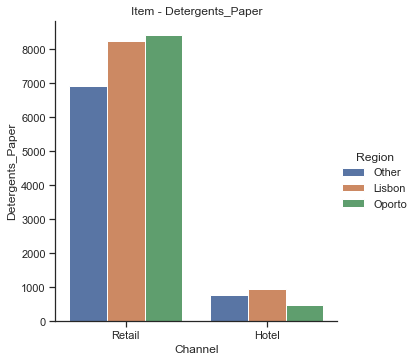

In [79]:
# Plotting Detergents_Paper
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

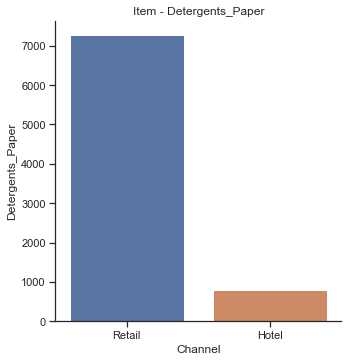

In [80]:
sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=df)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

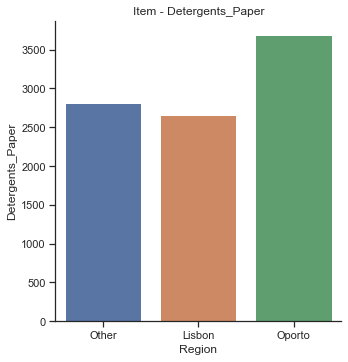

In [81]:
sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=df)
plt.title('Item - Detergents_Paper')

In [82]:
# As per above plot Detergents_Paper items are most sold in Retail under Channel and under Region its Oporto.

Text(0.5, 1.0, 'Delicatessen')

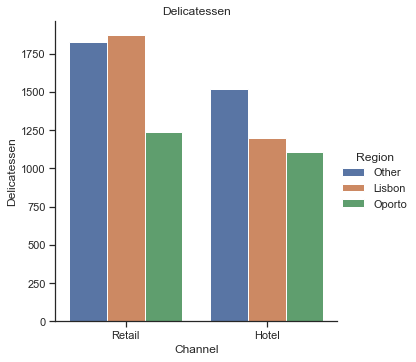

In [83]:
# Plotting Delicatessen Items
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

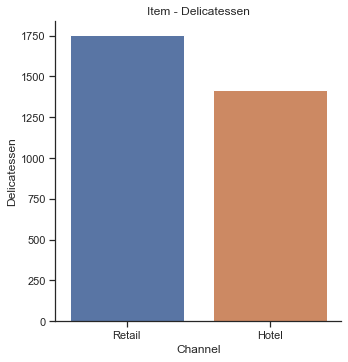

In [84]:
sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=df)
plt.title('Item - Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

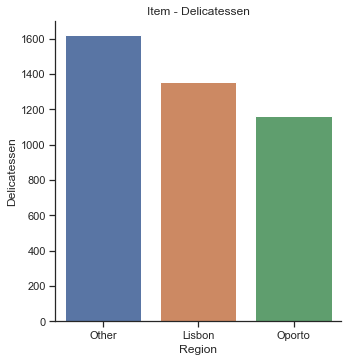

In [85]:
sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=df)
plt.title('Item - Delicatessen')

In [86]:
# As per above plot Delicatessen items are most sold in Retail under Channel and under Region its Other.

In [87]:
# 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [90]:
import math
products = df[df.columns[+2:df.columns.size]]

In [91]:
standard_deviation = products.std() #use standard deviation to check the measure of variabilty
standard_deviation.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

In [92]:
# Fresh item have highest Standard deviation So that is Inconsistent.
# Delicatessen item have smallest Standard deviation, So that is consistent.

In [93]:
# Based on coeffiecent of Variation

In [94]:
cv_fresh = np.std(products['Fresh']) / np.mean(products['Fresh'])
cv_fresh

1.0527196084948245

In [95]:
cv_fresh = np.std(products['Milk']) / np.mean(products['Milk'])
cv_fresh

1.2718508307424503

In [96]:
cv_fresh = np.std(products['Grocery']) / np.mean(products['Grocery'])
cv_fresh

1.193815447749267

In [97]:
cv_fresh = np.std(products['Frozen']) / np.mean(products['Frozen'])
cv_fresh

1.5785355298607762

In [98]:
cv_fresh = np.std(products['Detergents_Paper']) / np.mean(products['Detergents_Paper'])
cv_fresh

1.6527657881041729

In [99]:
cv_fresh = np.std(products['Delicatessen']) / np.mean(products['Delicatessen'])
cv_fresh

1.8473041039189306

In [104]:
variance_items = products.var()
variance_items

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [105]:
# “Fresh” items have lowest coefficient of Variation So that is consistent.

# “Delicatessen” items have highest coefficient of Variation, So that is Inconsistent.

In [106]:
# Need to plot a grah for above.

In [107]:
# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

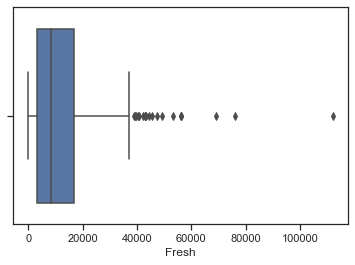

In [111]:
sns.boxplot(data=df, x=df.Fresh);

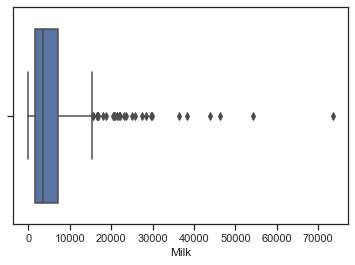

In [114]:
sns.boxplot(data=df, x=df.Milk);

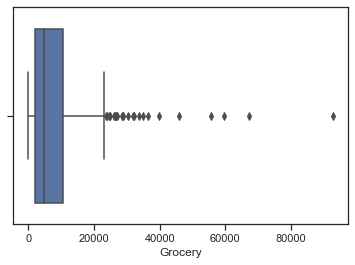

In [115]:
sns.boxplot(data=df, x=df.Grocery);

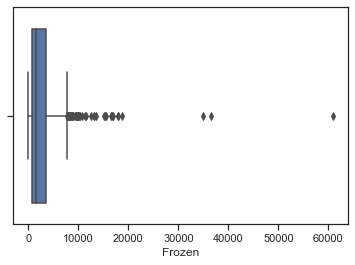

In [118]:
sns.boxplot(data=df, x=df.Frozen);

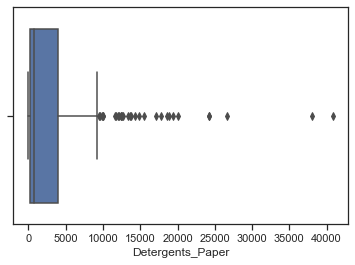

In [119]:
sns.boxplot(data=df, x=df.Detergents_Paper);

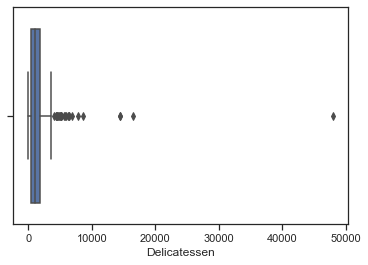

In [120]:
sns.boxplot(data=df, x=df.Delicatessen);

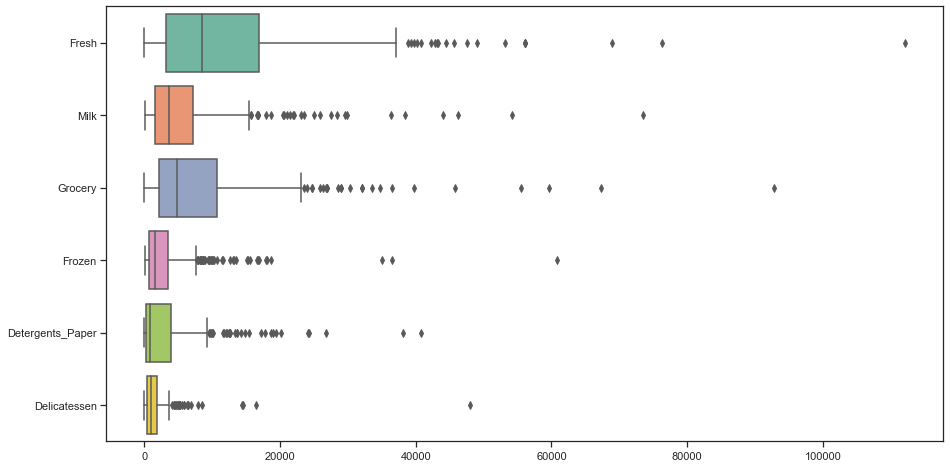

In [123]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="h", palette="Set2")

In [121]:
# As per above plots, Yes there are outliers in all the items across the product range (Fresh, Milk, Grocery, Frozen, Detergents_Paper & Delicatessen).

In [122]:
# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

In [ ]:
# As per the analysis, I find out that there are inconsistencies in spending of different items (by calculating Coefficient of 
# Variation), which should be minimized. The spending of Hotel and Retail channel are different which should be more or less 
# equal. And also spent should equal for different regions. Need to focus on other items also than “Fresh” and “Grocery”.